In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import numpy as np

In [11]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [19]:
iris = load_iris()
X = iris.data

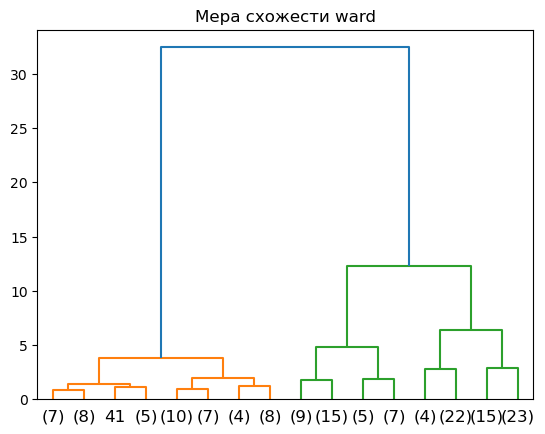

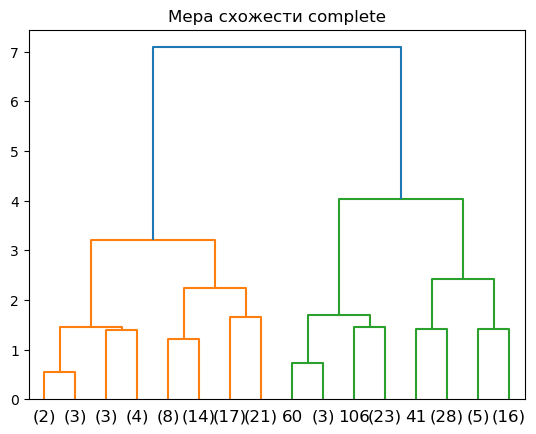

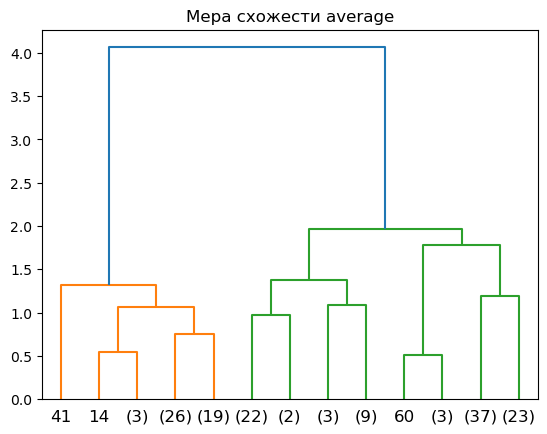

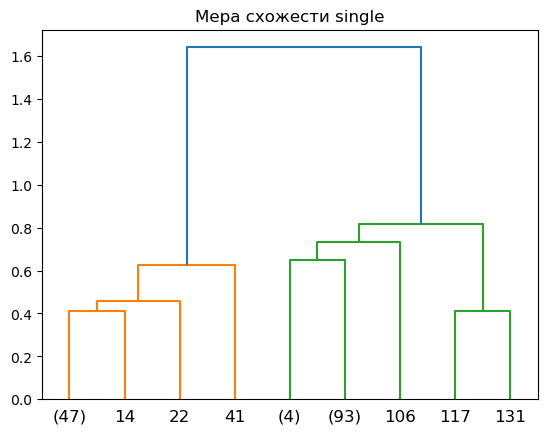

In [21]:
for linkage in ['ward', 'complete', 'average', 'single']:
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = linkage)
    model = model.fit(X)
    plt.title("Мера схожести {}".format(linkage))
    plot_dendrogram(model, truncate_mode="level", p=3)
    plt.show()